In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch
import torch.optim as optim
import torchvision
from einops import rearrange

In [83]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [84]:
def matrix_factorize(I,r,device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")):
    I = I.to(device)

    # Initialize the W and H matricies
    W = torch.randn(I.shape[0],r,device=device ,requires_grad=True)
    H = torch.randn(r,I.shape[1], device=device ,requires_grad=True)

    # Using gradient descent on W and H
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(I)

    threshold = 0.000001
    loss0 = np.inf
    loss1 = 0
    count = 0

    while abs(loss0 - loss1) > threshold:
        diff_matrix = torch.mm(W,H) - I
        diff_vec = diff_matrix[mask]
        loss = torch.norm(diff_vec)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss0,loss1 = loss1,loss
        if count % 500 == 0:
            print(count,"loss:",loss)
        count+=1

    # for i in range(1500):
    #     # Compute the loss
    #     diff_matrix = torch.mm(W, H) - I
    #     diff_vector = diff_matrix[mask]
    #     loss = torch.norm(diff_vector)
        
    #     # Zero the gradients
    #     optimizer.zero_grad()
        
    #     # Backpropagate
    #     loss.backward()
        
    #     # Update the parameters
    #     optimizer.step()

    #     if i % 500 == 0:
    #         print(i,"loss:",loss)
    
    #     # Early stopping condition
    #     loss0, loss1 = loss1, loss
    #     if abs(loss0 - loss1) < threshold:
    #         break
    
    return W,H,loss


In [85]:
!wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg -O dog.jpg

--2024-09-20 12:40:00--  https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg
Resolving segment-anything.com (segment-anything.com)... 54.230.18.129, 54.230.18.18, 54.230.18.11, ...
Connecting to segment-anything.com (segment-anything.com)|54.230.18.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221810 (217K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 216.61K  --.-KB/s    in 0.03s   

2024-09-20 12:40:00 (7.58 MB/s) - ‘dog.jpg’ saved [221810/221810]



In [86]:
# Load image
img = torchvision.io.read_image('dog.jpg')
print(img.shape)

torch.Size([3, 1365, 2048])


In [87]:
# Normalize the image
img = (img - img.min()) / (img.max() - img.min())
print(img)

tensor([[[0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3765, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3804, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3843, 0.3804, 0.3804]],

        [[0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         ...,
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3176, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3216, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3255, 0.3216, 0.3216]],

        [[0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.

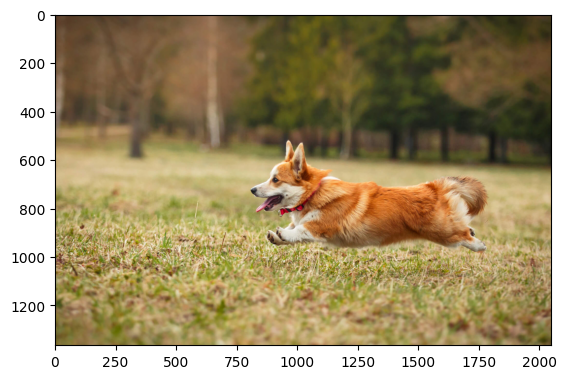

In [88]:
plt.imshow(img.permute(1,2,0))

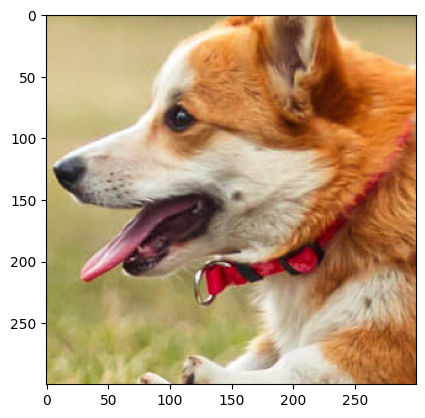

In [89]:
img = torchvision.transforms.functional.crop(img.cpu(), 600, 800, 300, 300)
plt.imshow(img.permute(1,2,0))

In [90]:
print(img.shape)

torch.Size([3, 300, 300])


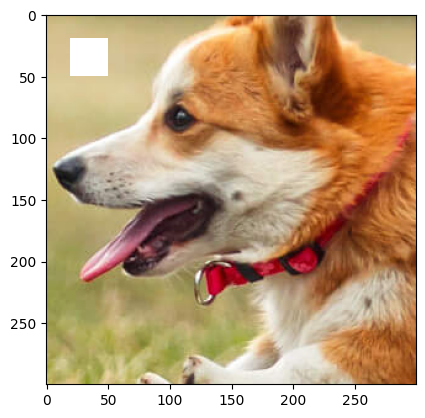

In [91]:
# Select any 30x30 part of image and convert it to nan
img_crop = img.clone()
img_crop[:,20:50,20:50] = float('nan')
plt.imshow(img_crop.permute(1,2,0))

MATRIX FACTORIZATION ON 3 CHANNALS SEPARATELY

In [92]:
# Image reconstruction using matrix factorization
rank = 150
reconstructed_channels = []

for i in range(3): 
    print("\nMatrix Factorisation for channel_"+str(i)) 
    channel = img_crop[i]
    W, H, loss = matrix_factorize(channel, rank)
    reconstructed_channel = torch.mm(W, H)
    reconstructed_channels.append(reconstructed_channel)
    print("final loss for channel_"+str(i),"is:",loss)



Matrix Factorisation for channel_0
0 loss: tensor(3671.9131, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(9.8345, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(8.0276, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(7.1687, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(6.6160, grad_fn=<LinalgVectorNormBackward0>)
2500 loss: tensor(6.2105, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_0 is: tensor(6.1093, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_1
0 loss: tensor(3668.8369, grad_fn=<LinalgVectorNormBackward0>)
500 loss: tensor(9.6267, grad_fn=<LinalgVectorNormBackward0>)
1000 loss: tensor(7.8355, grad_fn=<LinalgVectorNormBackward0>)
1500 loss: tensor(7.0644, grad_fn=<LinalgVectorNormBackward0>)
2000 loss: tensor(6.5774, grad_fn=<LinalgVectorNormBackward0>)
final loss for channel_1 is: tensor(6.3337, grad_fn=<LinalgVectorNormBackward0>)

Matrix Factorisation for channel_2
0 loss: tensor(3663.2915, grad_fn=<Lina

In [93]:
reconstructed_channels_clipped = []
for i in range(3):
    channel_clipped = torch.clamp(reconstructed_channels[i], min=0, max=1)
    reconstructed_channels_clipped.append(channel_clipped)

In [94]:
# Stacking the reconstructed channels back together
reconstructed_image_factorisation = torch.stack(reconstructed_channels_clipped)
print(reconstructed_image_factorisation.shape)

torch.Size([3, 300, 300])


In [95]:
reconstructed_image_factorisation = reconstructed_image_factorisation.permute(1,2,0).detach().cpu().numpy()
print(reconstructed_image_factorisation.shape)

(300, 300, 3)


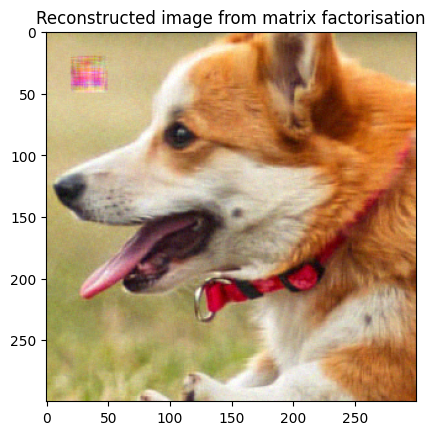

In [96]:
plt.title("Reconstructed image from matrix factorisation")
plt.imshow(reconstructed_image_factorisation)

RANDOM FOURIER FEATURES

In [97]:
def create_coordinate_map(img):
    """
    img: torch.Tensor of shape (num_channels, height, width)
    
    return: tuple of torch.Tensor of shape (height * width, 2) because 2 coordiates x and y and torch.Tensor of shape (height * width, num_channels) because 3 channels
    """
    
    num_channels, height, width = img.shape
    
    # Create a 2D grid of (x,y) coordinates (h, w)
    # width values change faster than height values
    w_coords = torch.arange(width).repeat(height, 1)          #shape = height x width
    h_coords = torch.arange(height).repeat(width, 1).t()      #shape = height x width
    w_coords = w_coords.reshape(-1)                           # flattening: shape = (height x width),
    h_coords = h_coords.reshape(-1)

    # Combine the x and y coordinates into a single tensor
    X = torch.stack([h_coords, w_coords], dim=1).float()

    # Move X to GPU if available
    X = X.to(device)

    # Reshape the image to (h * w, num_channels)
    Y = rearrange(img, 'c h w -> (h w) c').float()
    return X, Y

In [98]:
def train(model, lr, X, Y, epochs, verbose=True):
    """
    model: torch.nn.Module
    lr: learning rate(float)
    X: torch.Tensor of shape (num_samples,num_of_features)
    Y: torch.Tensor of shape (num_samples, 1)
    """

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch} loss: {loss.item():.6f}")
    return loss.item()

In [99]:
# create RFF features
def create_rff_features(X, num_features, sigma):
    from sklearn.kernel_approximation import RBFSampler
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2))
    X = X.cpu().numpy()
    X = rff.fit_transform(X)
    return torch.tensor(X, dtype=torch.float32).to(device)

In [100]:
coordinates,intensity = create_coordinate_map(img_crop)

In [101]:
print(coordinates.shape)
print(coordinates)

torch.Size([90000, 2])
tensor([[  0.,   0.],
        [  0.,   1.],
        [  0.,   2.],
        ...,
        [299., 297.],
        [299., 298.],
        [299., 299.]])


In [102]:
print(intensity.shape)
print(intensity)

torch.Size([90000, 3])
tensor([[0.7686, 0.6941, 0.4745],
        [0.7686, 0.6941, 0.4745],
        [0.7686, 0.6941, 0.4745],
        ...,
        [0.6275, 0.3294, 0.0863],
        [0.5804, 0.2706, 0.0392],
        [0.5686, 0.2588, 0.0392]])


In [103]:
torch.isnan(intensity).any()

tensor(True)

In [104]:
X_rff = create_rff_features(coordinates, 37500, 0.008)

In [105]:
X_rff.shape

torch.Size([90000, 37500])

To pass to the model, we need to remove the rows which have nan intensity and the corresponding rows in X_rff matrix

In [106]:
# Identify rows in 'intensity' that contain NaN values
nan_mask = torch.isnan(intensity).any(dim=1)

# Filter out rows with NaN values from both tensors
filtered_xrff = X_rff[~nan_mask]
filtered_intensity = intensity[~nan_mask]

print(f"Filtered Coordinates: {filtered_xrff.shape}")
print(f"Filtered Intensity: {filtered_intensity.shape}")

Filtered Coordinates: torch.Size([89100, 37500])
Filtered Intensity: torch.Size([89100, 3])


In [107]:
in_features = 37500
out_features = 3
model = torch.nn.Linear(in_features, out_features)
model.to(device)

train(model, 0.005, filtered_xrff, filtered_intensity, 2500)

Epoch 0 loss: 0.368028
Epoch 10 loss: 0.312578
Epoch 20 loss: 0.263687
Epoch 30 loss: 0.221316
Epoch 40 loss: 0.185269
Epoch 50 loss: 0.155082
Epoch 60 loss: 0.130123
Epoch 70 loss: 0.109705
Epoch 80 loss: 0.093146
Epoch 90 loss: 0.079815
Epoch 100 loss: 0.069152
Epoch 110 loss: 0.060667
Epoch 120 loss: 0.053950
Epoch 130 loss: 0.048654
Epoch 140 loss: 0.044496
Epoch 150 loss: 0.041241
Epoch 160 loss: 0.038701
Epoch 170 loss: 0.036720
Epoch 180 loss: 0.035175
Epoch 190 loss: 0.033967
Epoch 200 loss: 0.033016
Epoch 210 loss: 0.032263
Epoch 220 loss: 0.031658
Epoch 230 loss: 0.031165
Epoch 240 loss: 0.030755
Epoch 250 loss: 0.030408
Epoch 260 loss: 0.030108
Epoch 270 loss: 0.029843
Epoch 280 loss: 0.029604
Epoch 290 loss: 0.029385
Epoch 300 loss: 0.029181
Epoch 310 loss: 0.028989
Epoch 320 loss: 0.028807
Epoch 330 loss: 0.028633
Epoch 340 loss: 0.028465
Epoch 350 loss: 0.028303
Epoch 360 loss: 0.028146
Epoch 370 loss: 0.027993
Epoch 380 loss: 0.027845
Epoch 390 loss: 0.027700
Epoch 400 l

0.018644174560904503

In [108]:
print(img)
print(img.shape)

tensor([[[0.7686, 0.7686, 0.7686,  ..., 0.5451, 0.5451, 0.5412],
         [0.7725, 0.7725, 0.7725,  ..., 0.5686, 0.5686, 0.5647],
         [0.7765, 0.7765, 0.7765,  ..., 0.5882, 0.5843, 0.5843],
         ...,
         [0.7961, 0.7373, 0.7176,  ..., 0.5843, 0.5725, 0.5490],
         [0.8471, 0.7843, 0.7451,  ..., 0.6039, 0.5686, 0.5569],
         [0.8784, 0.8196, 0.7686,  ..., 0.6275, 0.5804, 0.5686]],

        [[0.6941, 0.6941, 0.6941,  ..., 0.5137, 0.5137, 0.5098],
         [0.6980, 0.6980, 0.6980,  ..., 0.5255, 0.5255, 0.5216],
         [0.7020, 0.7020, 0.7020,  ..., 0.5451, 0.5412, 0.5412],
         ...,
         [0.7686, 0.7098, 0.6863,  ..., 0.2824, 0.2706, 0.2431],
         [0.8157, 0.7569, 0.7137,  ..., 0.3059, 0.2667, 0.2431],
         [0.8431, 0.7882, 0.7333,  ..., 0.3294, 0.2706, 0.2588]],

        [[0.4745, 0.4745, 0.4745,  ..., 0.3294, 0.3294, 0.3255],
         [0.4784, 0.4784, 0.4784,  ..., 0.3451, 0.3451, 0.3412],
         [0.4824, 0.4824, 0.4824,  ..., 0.3647, 0.3608, 0.

In [109]:
img_rff = model(X_rff)
print(img_rff)
print(img_rff.shape)

tensor([[0.7359, 0.6642, 0.4528],
        [0.7504, 0.6812, 0.4651],
        [0.7251, 0.6675, 0.4547],
        ...,
        [0.5658, 0.2745, 0.0807],
        [0.5589, 0.2798, 0.1064],
        [0.5694, 0.2827, 0.1185]], grad_fn=<AddmmBackward0>)
torch.Size([90000, 3])


In [110]:
num_channels, height, width = img.shape
img_rff = img_rff.reshape(height, width, num_channels)
print(img_rff)
print(img_rff.shape)

tensor([[[0.7359, 0.6642, 0.4528],
         [0.7504, 0.6812, 0.4651],
         [0.7251, 0.6675, 0.4547],
         ...,
         [0.7855, 0.7223, 0.5948],
         [0.7810, 0.7014, 0.5538],
         [0.7704, 0.6775, 0.5290]],

        [[0.7219, 0.6535, 0.4391],
         [0.7299, 0.6649, 0.4475],
         [0.7186, 0.6649, 0.4474],
         ...,
         [0.8040, 0.7410, 0.6211],
         [0.8011, 0.7151, 0.5719],
         [0.7924, 0.6941, 0.5505]],

        [[0.7206, 0.6559, 0.4492],
         [0.7145, 0.6497, 0.4423],
         [0.7132, 0.6630, 0.4579],
         ...,
         [0.7652, 0.7218, 0.6010],
         [0.7593, 0.6894, 0.5553],
         [0.7596, 0.6736, 0.5415]],

        ...,

        [[0.6152, 0.4867, 0.1947],
         [0.5544, 0.4211, 0.1233],
         [0.5241, 0.3769, 0.0844],
         ...,
         [0.5551, 0.2623, 0.0541],
         [0.5600, 0.2811, 0.0926],
         [0.5544, 0.2741, 0.0851]],

        [[0.6010, 0.4703, 0.1812],
         [0.5579, 0.4275, 0.1237],
         [0.

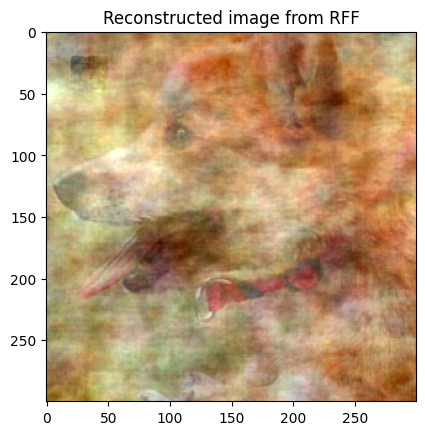

In [111]:
plt.title("Reconstructed image from RFF")
img_rff = torch.clamp(img_rff, min=0, max=1)
img_rff = img_rff.cpu().detach().numpy()
plt.imshow(img_rff)
plt.show()

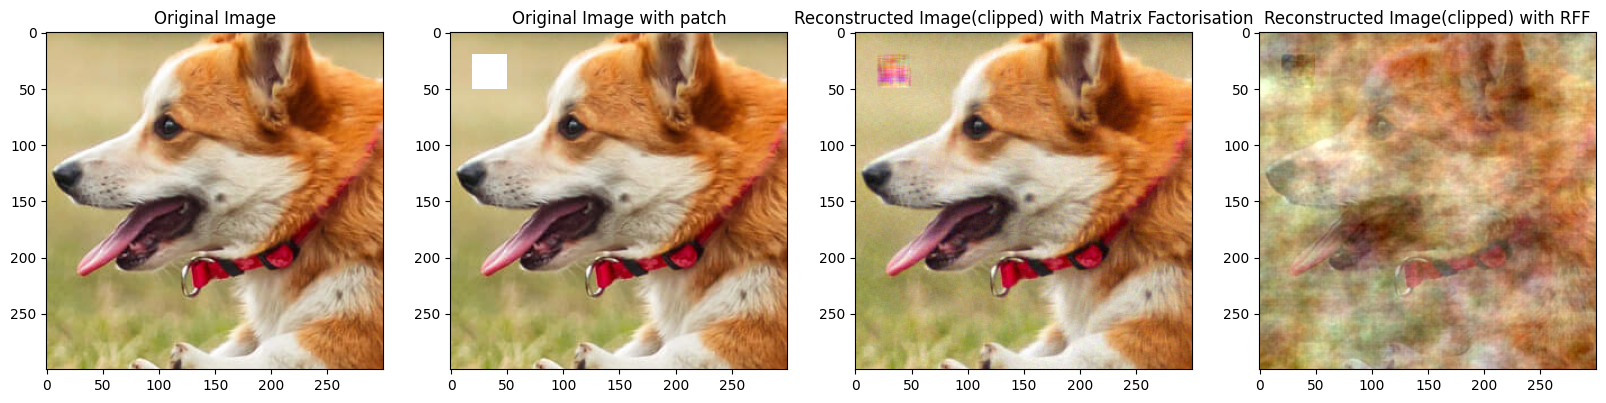

In [112]:
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.imshow(img.permute(1,2,0))
plt.title("Original Image")

plt.subplot(1,4,2)
plt.imshow(img_crop.permute(1,2,0))
plt.title("Original Image with patch")

plt.subplot(1,4,3)
plt.imshow(reconstructed_image_factorisation)
plt.title("Reconstructed Image(clipped) with Matrix Factorisation")

plt.subplot(1,4,4)
plt.imshow(img_rff)
plt.title("Reconstructed Image(clipped) with RFF")

plt.show()

In [113]:
def rmse(y,y_hat):
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    return rmse

def psnr(y,y_hat):
    rmse_value = rmse(y,y_hat)
    if rmse==0:
        psnr == np.inf
    else:
        psnr = 20 * np.log10(1/rmse_value)
    return psnr

In [114]:
img_permuted = img.permute(1,2,0).cpu().detach().numpy()
print(img_permuted.shape)

(300, 300, 3)


In [122]:
# ## Calculate RMSE and PSNR on clipped array or standardized array with original array

print("RMSE for original image and reconstructed image(Clipped) with matrix factorisation:",rmse(img_permuted,reconstructed_image_factorisation))
print("PSNR for original image and reconstructed image(Clipped) with matrix factorisation:",psnr(img_permuted,reconstructed_image_factorisation))
print("RMSE for original image and reconstructed image(Clipped) with RFF:",rmse(img_permuted,img_rff))
print("PSNR for original image and reconstructed image(Clipped) with RFF:",psnr(img_permuted,img_rff))

RMSE for original image and reconstructed image(Clipped) with matrix factorisation: 0.02838918
PSNR for original image and reconstructed image(Clipped) with matrix factorisation: 30.936943007012605
RMSE for original image and reconstructed image(Clipped) with RFF: 0.13806693
PSNR for original image and reconstructed image(Clipped) with RFF: 17.19820647575045
